In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [2]:
data=pd.read_csv("datasets\\student_evaluation.csv")

In [3]:
data = data[:100]

In [4]:
data.shape

(100, 33)

In [5]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [6]:
data.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [7]:
data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,1.0,2.0,1.110000,2.020000,3.280000,3.390000,3.480000,3.460000,3.450000,3.600000,...,3.610000,3.620000,3.630000,3.610000,3.600000,3.610000,3.630000,3.560000,3.53000,3.600000
std,0.0,0.0,0.399368,1.263153,0.964836,1.448754,1.403315,1.402883,1.388081,1.392621,...,1.377269,1.346751,1.375507,1.384583,1.378038,1.340096,1.382831,1.402163,1.41746,1.399856
min,1.0,2.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,1.0,2.0,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000
50%,1.0,2.0,1.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000
75%,1.0,2.0,1.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
max,1.0,2.0,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [9]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,100.0,100.0,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,0.0,0.0,-2.986500e-16,-1.998401e-17,2.042810e-16,-7.327472e-17,5.329071e-17,3.552714e-17,-1.509903e-16,-6.883383e-17,...,1.021405e-16,-7.327472e-17,9.992007e-17,9.769963e-17,-8.215650e-17,9.103829e-17,8.437695e-17,-5.995204e-17,1.310063e-16,-8.659740e-17
std,0.0,0.0,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,...,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,0.0,0.0,-2.768226e-01,-1.607229e+00,-2.375000e+00,-1.658004e+00,-1.776147e+00,-1.762366e+00,-1.773919e+00,-1.876388e+00,...,-1.904602e+00,-1.955224e+00,-1.921654e+00,-1.894540e+00,-1.896245e+00,-1.957433e+00,-1.911477e+00,-1.834949e+00,-1.793875e+00,-1.866691e+00
25%,0.0,0.0,-2.768226e-01,-8.115712e-01,-2.916667e-01,-9.642785e-01,-3.437704e-01,-3.295481e-01,-3.258219e-01,-4.330127e-01,...,-4.451369e-01,-4.626866e-01,-4.603202e-01,-4.427853e-01,-4.375950e-01,-4.574843e-01,-4.578822e-01,-4.013950e-01,-3.757920e-01,-4.307749e-01
50%,0.0,0.0,-2.768226e-01,-1.591316e-02,-2.916667e-01,4.231726e-01,3.724179e-01,3.868608e-01,3.982267e-01,2.886751e-01,...,2.845957e-01,2.835821e-01,2.703468e-01,2.830922e-01,2.917300e-01,2.924899e-01,2.689149e-01,3.153818e-01,3.332495e-01,2.871833e-01
75%,0.0,0.0,-2.768226e-01,7.797448e-01,7.500000e-01,1.116898e+00,1.088606e+00,1.103270e+00,1.122275e+00,1.010363e+00,...,1.014328e+00,1.029851e+00,1.001014e+00,1.008970e+00,1.021055e+00,1.042464e+00,9.957121e-01,1.032159e+00,1.042291e+00,1.005141e+00
max,0.0,0.0,4.756316e+00,1.575403e+00,1.791667e+00,1.116898e+00,1.088606e+00,1.103270e+00,1.122275e+00,1.010363e+00,...,1.014328e+00,1.029851e+00,1.001014e+00,1.008970e+00,1.021055e+00,1.042464e+00,9.957121e-01,1.032159e+00,1.042291e+00,1.005141e+00


In [10]:
agglomirative = AgglomerativeClustering()

In [11]:
clusters = agglomirative.fit(data_scaled)

In [12]:
def plot_dendrogram(model):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix)

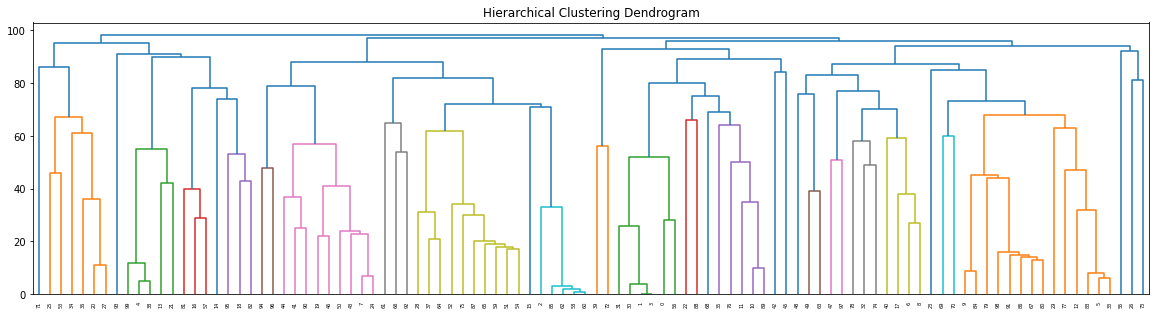

In [13]:
plt.figure(figsize=(20,5))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clusters)

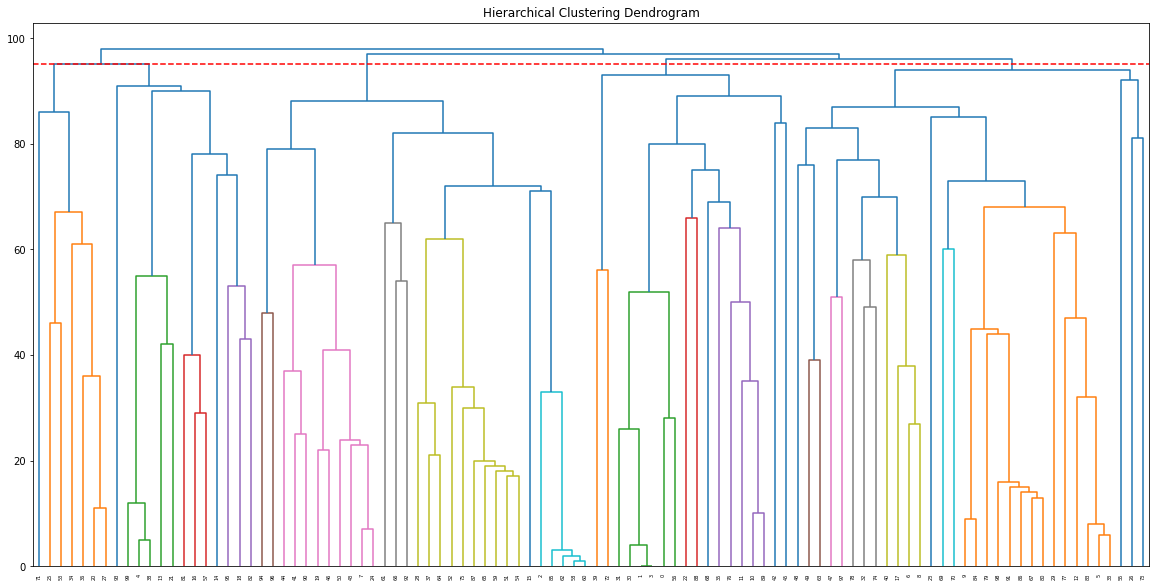

In [14]:
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clusters)
plt.axhline(y=95, color='r', linestyle='--',)

In [15]:
agglomirative = AgglomerativeClustering(n_clusters=4)

In [16]:
clusters = agglomirative.fit(data_scaled)

In [17]:
pd.Series(clusters.labels_).value_counts()

1    32
2    30
0    20
3    18
dtype: int64

In [18]:
list = [1,2,3,4,5,6]

In [19]:
list = ['rohit', 'ram']

In [21]:
list

['rohit', 'ram']